# Classification trees

A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It's a flowchart-like tree structure where each internal node represents a "test" on an attribute (e.g., whether a feature is above or below a certain threshold), each branch represents the outcome of the test, and each leaf node represents a class label or a regression value.

Here's how it works:  

**Splitting**: The decision tree algorithm starts at the root node and splits the data into subsets based on the value of an attribute. This splitting process continues recursively for each child node until one of the stopping conditions is met.  

**Stopping Criteria**: The splitting process continues until one of the following conditions is met:

All data points in a node belong to the same class (for classification) or have similar values (for regression).
- No further features are available to split on.
- A pre-defined maximum depth of the tree is reached.
- A minimum number of data points in a node is reached.  
**Predictions**: Once the tree is constructed, new data points are classified or predicted by navigating through the tree from the root to a leaf node based on the feature values of the data points. The predicted class or value associated with the leaf node is then assigned to the new data point.

Decision trees are easy to interpret and visualize, making them popular for exploratory data analysis. However, they can be prone to overfitting, especially with complex datasets. Techniques like pruning and limiting the tree depth can help mitigate overfitting. Additionally, ensemble methods like Random Forests and Gradient Boosting Trees are often used to improve performance and robustness.







In [57]:
#Import all the libraries needed in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
#Downloading the data, the training and the test set
data = pd.read_csv("Data.csv")
data_test = pd.read_csv("test_set.csv") 
data_train = pd.read_csv("train_set.csv")

# Carica il dataset PCA completo
data_pca = pd.read_csv('data_pca.csv')
data_train_pca = pd.read_csv('train_set_pca.csv')
data_test_pca = pd.read_csv('test_set_pca.csv')

In [3]:
#Separating the feature from the outcome
X_train = data_train.drop('diagnosis', axis=1)
y_train = data_train['diagnosis']
X_test = data_test.drop('diagnosis', axis=1)
y_test = data_test['diagnosis']

'''
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

In [4]:
X_train_pca = data_train_pca.drop('diagnosis', axis=1)
y_train_pca = data_train_pca['diagnosis']
X_test_pca = data_test.drop('diagnosis', axis=1)
y_test_pca = data_test['diagnosis']

In [16]:
# Defining the k-fold cross-validation with k = 5
kf = KFold(n_splits=10, shuffle=True, random_state=87)

In [17]:
### Classificatio model

In [18]:
# Defining the decision tree regression model
tree_model = DecisionTreeClassifier()

# Performing k-fold cross-validation with the defined model
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=kf)

# Printing the k-fold cross-validation scores
print("Cross-validation scores:", cv_scores)

# Training the decision tree on the entire training set
tree_model.fit(X_train, y_train)

Cross-validation scores: [0.92       1.         0.92       0.98       0.84       0.98
 0.96       0.88       0.96       0.97959184]


DecisionTreeClassifier()

Confusion Matrix - Training Set:
[[253   0]
 [  0 246]]
Accuracy on Training Set: 1.0
Precision on Training Set: 1.0
Recall on Training Set: 1.0
F1 Score on Training Set: 1.0


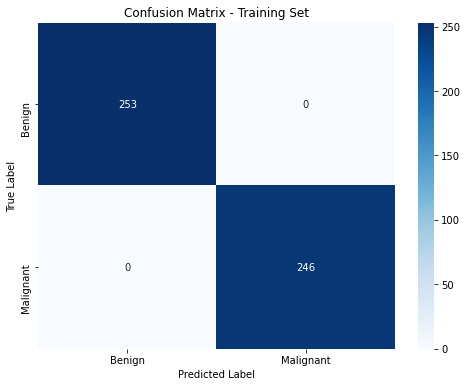

Confusion Matrix - Test Set:
[[ 94  10]
 [  4 107]]
Accuracy on Test Set: 0.9349
Precision on Test Set: 0.9145
Recall on Test Set: 0.964
F1 Score on Test Set: 0.9386


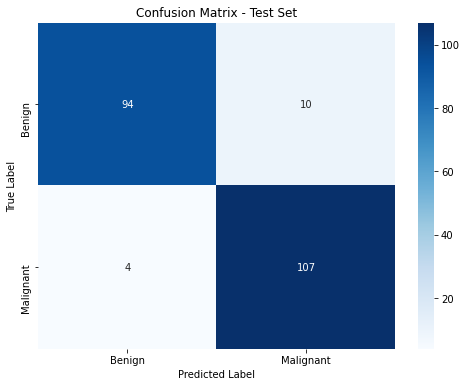

In [28]:
# Predictions on the training set
y_pred_train_tree = tree_model.predict(X_train)

# Confusion matrix calculation for training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train_tree)
print("Confusion Matrix - Training Set:")
print(conf_matrix_train)

# Calculation of accuracy for training set and rounding to 4 decimal places
accuracy_train = round(accuracy_score(y_train, y_pred_train_tree), 4)
print("Accuracy on Training Set:", accuracy_train)

# Calculation of precision for training set and rounding to 4 decimal places
precision_train = round(precision_score(y_train, y_pred_train_tree), 4)
print("Precision on Training Set:", precision_train)

# Calculation of recall for training set and rounding to 4 decimal places
recall_train = round(recall_score(y_train, y_pred_train_tree), 4)
print("Recall on Training Set:", recall_train)

# Calculation of F1 score for training set and rounding to 4 decimal places
f1_train = round(f1_score(y_train, y_pred_train_tree), 4)
print("F1 Score on Training Set:", f1_train)

# Display the confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predictions on the test set
y_pred_test_tree = tree_model.predict(X_test)

# Confusion matrix calculation for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test_tree)
print("Confusion Matrix - Test Set:")
print(conf_matrix_test)

# Calculation of accuracy for test set and rounding to 4 decimal places
accuracy_test = round(accuracy_score(y_test, y_pred_test_tree), 4)
print("Accuracy on Test Set:", accuracy_test)

# Calculation of precision for test set and rounding to 4 decimal places
precision_test = round(precision_score(y_test, y_pred_test_tree), 4)
print("Precision on Test Set:", precision_test)

# Calculation of recall for test set and rounding to 4 decimal places
recall_test = round(recall_score(y_test, y_pred_test_tree), 4)
print("Recall on Test Set:", recall_test)

# Calculation of F1 score for test set and rounding to 4 decimal places
f1_test = round(f1_score(y_test, y_pred_test_tree), 4)
print("F1 Score on Test Set:", f1_test)

# Display the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Plotting the tree

Accuracy on the training set: 1.0


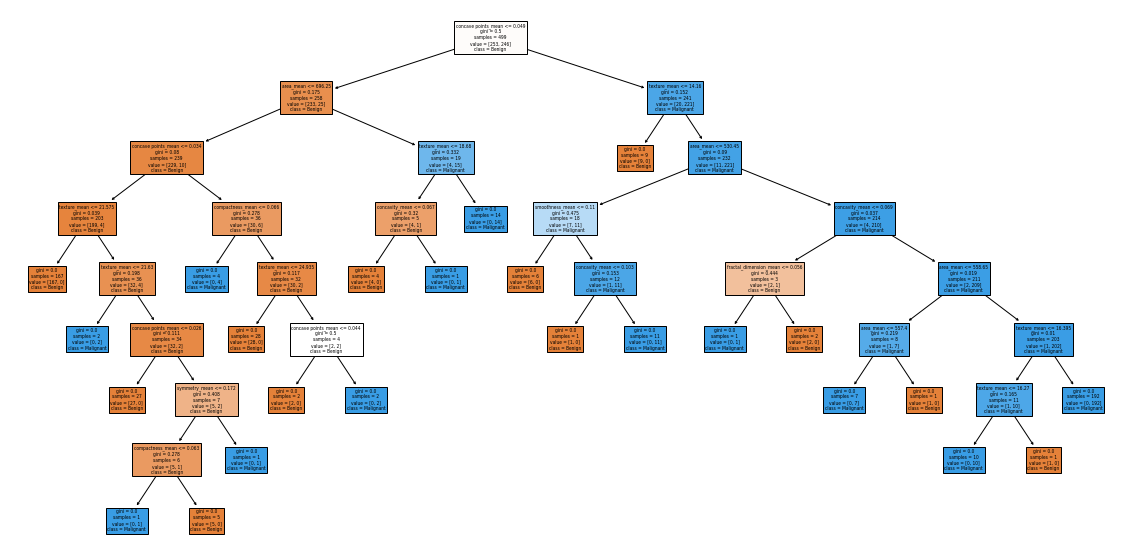

In [19]:
# Making predictions on the training set
train_predictions = tree_model.predict(X_train)

# Calculating accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on the training set:", train_accuracy)

# Flattening the decision tree for visualization (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"])
plt.show()

## Tuning of the hyperparameter of the trees

### Accuracy

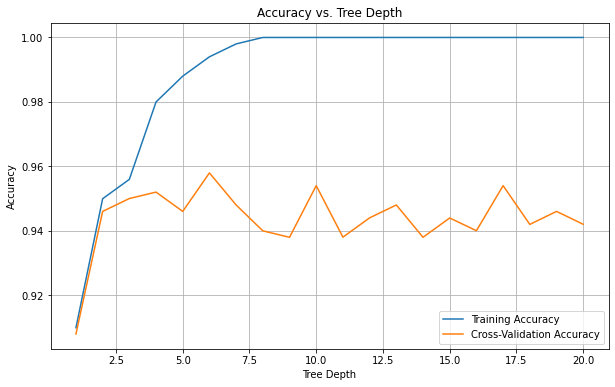

In [24]:
# Define a range of tree depths to explore
tree_depths = range(1, 21)

# Initialize lists to store accuracy scores
train_accuracies = []
cv_accuracies = []

# Define the number of folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=87)

# Iterate over each tree depth
for depth in tree_depths:
    # Initialize the decision tree classifier with the current depth
    tree_model = DecisionTreeClassifier(max_depth=depth)
    
    # Perform k-fold cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(tree_model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_scores)
    
    # Fit the decision tree model on the entire training set
    tree_model.fit(X_train, y_train)
    
    # Make predictions on the training set
    train_predictions = tree_model.predict(X_train)
    
    # Calculate accuracy on the training set
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    # Append accuracy scores to the lists
    train_accuracies.append(train_accuracy)
    cv_accuracies.append(mean_cv_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_accuracies, label='Training Accuracy')
plt.plot(tree_depths, cv_accuracies, label='Cross-Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

### Classification Error

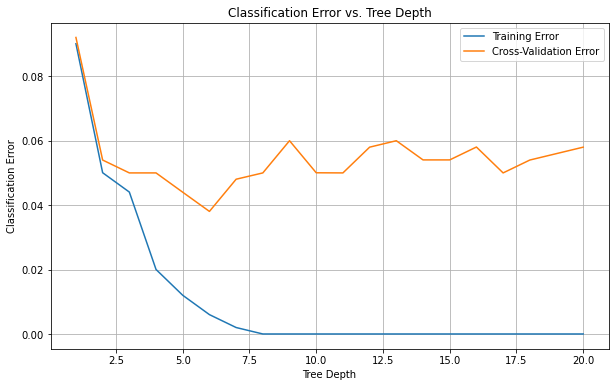

In [26]:
# Initialize lists to store classification errors
train_errors = []
cv_errors = []

# Iterate over each tree depth
for depth in tree_depths:
    # Initialize the decision tree classifier with the current depth
    tree_model = DecisionTreeClassifier(max_depth=depth)
    
    # Perform k-fold cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(tree_model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_scores)
    
    # Fit the decision tree model on the entire training set
    tree_model.fit(X_train, y_train)
    
    # Make predictions on the training set
    train_predictions = tree_model.predict(X_train)
    
    # Calculate classification error on the training set
    train_error = 1 - accuracy_score(y_train, train_predictions)
    
    # Append classification errors to the lists
    train_errors.append(train_error)
    cv_errors.append(1 - mean_cv_accuracy)

# Plotting the classification errors
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, train_errors, label='Training Error')
plt.plot(tree_depths, cv_errors, label='Cross-Validation Error')
plt.xlabel('Tree Depth')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the classification error as a function of the tree depth for both the training and cross-validation sets.

### Training Error:

The training error decreases as the tree depth increases. This is expected because deeper trees can fit the training data more closely, reducing the training error.
The training error eventually reaches zero, indicating that the tree has perfectly fit the training data, which can be a sign of overfitting.

### Cross-Validation Error:

The cross-validation error initially decreases as the tree depth increases, indicating that the model is improving and generalizing better.
However, after a certain point, the cross-validation error starts to fluctuate and doesn't decrease significantly. This indicates that further increasing the tree depth does not improve the model's performance on unseen data and might even start to overfit the training data.
From the plot, it looks like the optimal tree depth is somewhere around 3 to 5, where the cross-validation error is minimized and relatively stable.

## Selecting the Best Tree Depth to Avoid Overfitting 

### max depth = 5
We can use the value of tree depth that minimizes the cross-validation error. Let's modify the code to fit a decision tree with the optimal tree depth, which in this case appears to be around 3 to 5.

In [31]:
# Train the decision tree with a depth of 5
tree_model_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_model_depth_5.fit(X_train, y_train)

# Predictions on the training set
y_pred_train_tree_depth_5 = tree_model_depth_5.predict(X_train)

Confusion Matrix - Training Set:
[[251   2]
 [  4 242]]
Accuracy on Training Set: 0.988
Precision on Training Set: 0.9918
Recall on Training Set: 0.9837
F1 Score on Training Set: 0.9878


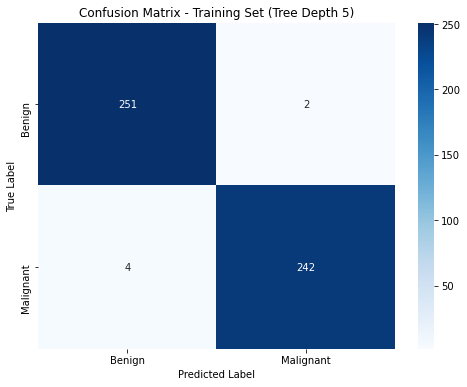

Confusion Matrix - Test Set:
[[ 96   8]
 [  5 106]]
Accuracy on Test Set: 0.9395
Precision on Test Set: 0.9298
Recall on Test Set: 0.955
F1 Score on Test Set: 0.9422


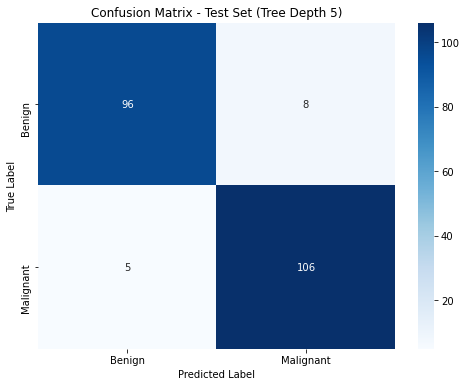

In [33]:
# Confusion matrix calculation for training set
conf_matrix_train_depth_5 = confusion_matrix(y_train, y_pred_train_tree_depth_5)
print("Confusion Matrix - Training Set:")
print(conf_matrix_train_depth_5)

# Calculation of accuracy for training set and rounding to 4 decimal places
accuracy_train_depth_5 = round(accuracy_score(y_train, y_pred_train_tree_depth_5), 4)
print("Accuracy on Training Set:", accuracy_train_depth_5)

# Calculation of precision for training set and rounding to 4 decimal places
precision_train_depth_5 = round(precision_score(y_train, y_pred_train_tree_depth_5), 4)
print("Precision on Training Set:", precision_train_depth_5)

# Calculation of recall for training set and rounding to 4 decimal places
recall_train_depth_5 = round(recall_score(y_train, y_pred_train_tree_depth_5), 4)
print("Recall on Training Set:", recall_train_depth_5)

# Calculation of F1 score for training set and rounding to 4 decimal places
f1_train_depth_5 = round(f1_score(y_train, y_pred_train_tree_depth_5), 4)
print("F1 Score on Training Set:", f1_train_depth_5)
# Display the confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_depth_5, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Training Set (Tree Depth 5)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predictions on the test set
y_pred_test_tree_depth_5 = tree_model_depth_5.predict(X_test)

# Confusion matrix calculation for test set
conf_matrix_test_depth_5 = confusion_matrix(y_test, y_pred_test_tree_depth_5)
print("Confusion Matrix - Test Set:")
print(conf_matrix_test_depth_5)

# Calculation of accuracy for test set and rounding to 4 decimal places
accuracy_test_depth_5 = round(accuracy_score(y_test, y_pred_test_tree_depth_5), 4)
print("Accuracy on Test Set:", accuracy_test_depth_5)

# Calculation of precision for test set and rounding to 4 decimal places
precision_test_depth_5 = round(precision_score(y_test, y_pred_test_tree_depth_5), 4)
print("Precision on Test Set:", precision_test_depth_5)

# Calculation of recall for test set and rounding to 4 decimal places
recall_test_depth_5 = round(recall_score(y_test, y_pred_test_tree_depth_5), 4)
print("Recall on Test Set:", recall_test_depth_5)

# Calculation of F1 score for test set and rounding to 4 decimal places
f1_test_depth_5 = round(f1_score(y_test, y_pred_test_tree_depth_5), 4)
print("F1 Score on Test Set:", f1_test_depth_5)

# Display the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_depth_5, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Test Set (Tree Depth 5)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Plotting the tree

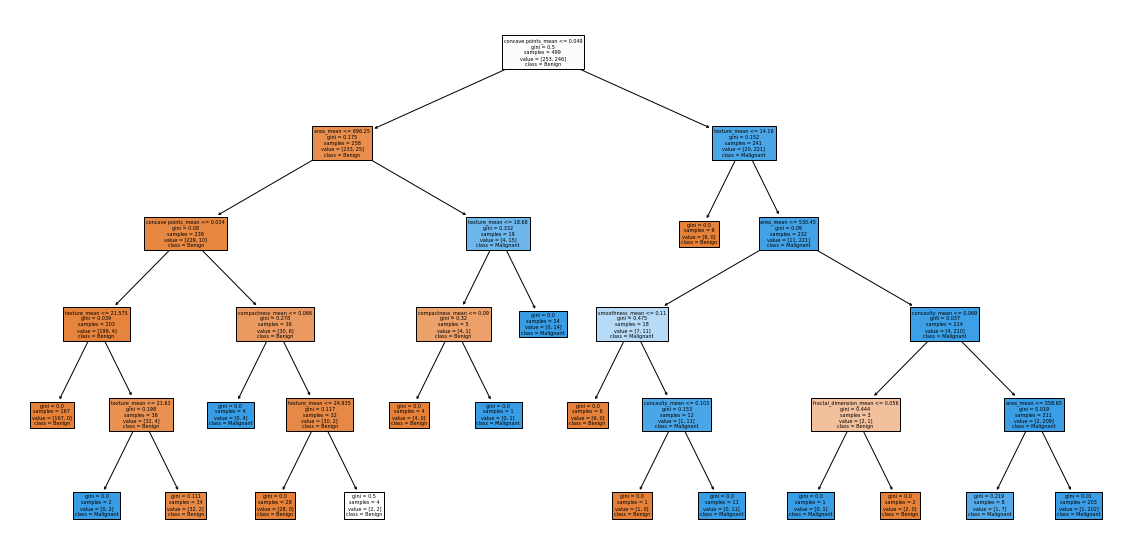

In [35]:
# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model_depth_5, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"])
plt.show()

## Methods of Pruning
Pruning is a technique used to reduce the size of a decision tree by removing parts of the tree that do not provide power in predicting target variables. Here are some common pruning methods:

**Pre-Pruning (Early Stopping**):

Max Depth: Limit the maximum depth of the tree.
- Min Samples Split: The minimum number of samples required to split an internal node.
- Min Samples Leaf: The minimum number of samples required to be at a leaf node.
- Max Leaf Nodes: Limit the number of leaf nodes in the tree.  

**Post Pruning**:

**Cost Complexity Pruning (CCP)**: Also known as weakest link pruning, it removes branches of the tree in a bottom-up fashion. This is implemented in scikit-learn using the ccp_alpha parameter.
Here is an example of how to use cost complexity pruning with ccp_alpha:

## Selecting the Best Tree Depth to Avoid Overfitting 

### max depth = 3
We can use the value of tree depth that minimizes the cross-validation error. Let's modify the code to fit a decision tree with the optimal tree depth, which in this case appears to be around 3 to 5.

In [36]:
# Train the decision tree with a depth of 3
tree_model_depth_3 = DecisionTreeClassifier(max_depth=3)
tree_model_depth_3.fit(X_train, y_train)

# Predictions on the training set
y_pred_train_tree_depth_3 = tree_model_depth_3.predict(X_train)

Confusion Matrix - Training Set:
[[242  11]
 [ 11 235]]
Accuracy on Training Set: 0.9559
Precision on Training Set: 0.9553
Recall on Training Set: 0.9553
F1 Score on Training Set: 0.9553


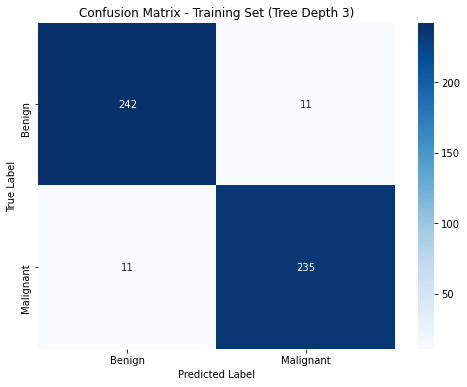

Confusion Matrix - Test Set:
[[ 93  11]
 [  4 107]]
Accuracy on Test Set: 0.9302
Precision on Test Set: 0.9068
Recall on Test Set: 0.964
F1 Score on Test Set: 0.9345


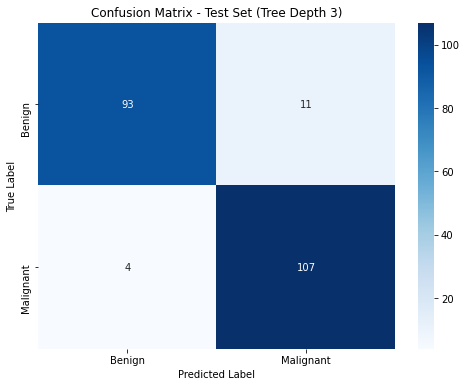

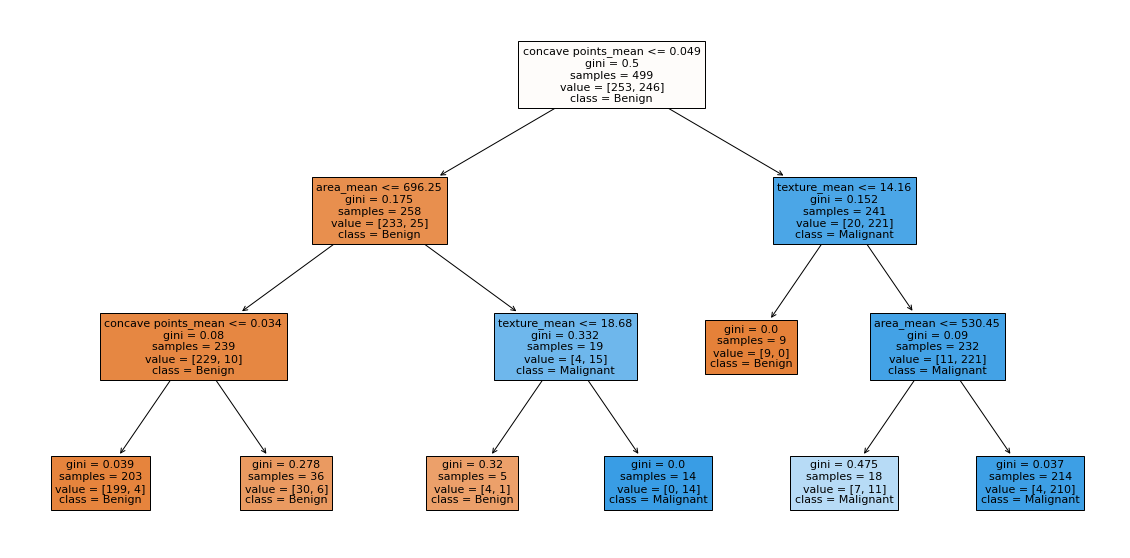

In [37]:
# Confusion matrix calculation for training set
conf_matrix_train_depth_3 = confusion_matrix(y_train, y_pred_train_tree_depth_3)
print("Confusion Matrix - Training Set:")
print(conf_matrix_train_depth_3)

# Calculation of accuracy for training set and rounding to 4 decimal places
accuracy_train_depth_3 = round(accuracy_score(y_train, y_pred_train_tree_depth_3), 4)
print("Accuracy on Training Set:", accuracy_train_depth_3)

# Calculation of precision for training set and rounding to 4 decimal places
precision_train_depth_3 = round(precision_score(y_train, y_pred_train_tree_depth_3), 4)
print("Precision on Training Set:", precision_train_depth_3)

# Calculation of recall for training set and rounding to 4 decimal places
recall_train_depth_3 = round(recall_score(y_train, y_pred_train_tree_depth_3), 4)
print("Recall on Training Set:", recall_train_depth_3)

# Calculation of F1 score for training set and rounding to 4 decimal places
f1_train_depth_3 = round(f1_score(y_train, y_pred_train_tree_depth_3), 4)
print("F1 Score on Training Set:", f1_train_depth_3)

# Display the confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_depth_3, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Training Set (Tree Depth 3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predictions on the test set
y_pred_test_tree_depth_3 = tree_model_depth_3.predict(X_test)

# Confusion matrix calculation for test set
conf_matrix_test_depth_3 = confusion_matrix(y_test, y_pred_test_tree_depth_3)
print("Confusion Matrix - Test Set:")
print(conf_matrix_test_depth_3)

# Calculation of accuracy for test set and rounding to 4 decimal places
accuracy_test_depth_3 = round(accuracy_score(y_test, y_pred_test_tree_depth_3), 4)
print("Accuracy on Test Set:", accuracy_test_depth_3)

# Calculation of precision for test set and rounding to 4 decimal places
precision_test_depth_3 = round(precision_score(y_test, y_pred_test_tree_depth_3), 4)
print("Precision on Test Set:", precision_test_depth_3)

# Calculation of recall for test set and rounding to 4 decimal places
recall_test_depth_3 = round(recall_score(y_test, y_pred_test_tree_depth_3), 4)
print("Recall on Test Set:", recall_test_depth_3)

# Calculation of F1 score for test set and rounding to 4 decimal places
f1_test_depth_3 = round(f1_score(y_test, y_pred_test_tree_depth_3), 4)
print("F1 Score on Test Set:", f1_test_depth_3)

# Display the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_depth_3, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Test Set (Tree Depth 3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model_depth_3, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"])
plt.show()


# Gini Index

**Formula**:

$$
G = 1 - \sum_{i=1}^{k} p_i^2
$$

**Where**:


$G$ is the Gini index.

$k$ is the number of classes or categories. 

$pi$ is the proportion of observations in the $ i^{\text{th}} $ class or category.

**Explanation**:

The Gini index is calculated by taking the sum of the squared probabilities of each class or category and subtracting it from 1. This formula measures the impurity or inequality in a given dataset. A lower Gini index indicates a more homogeneous dataset, while a higher index suggests greater impurity or inequality in the distribution of classes or categories.

In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def get_leaf_gini_indices(tree_model):
    # Get the tree structure
    tree = tree_model.tree_

    # Initialize a list to store the Gini indices of the leaf nodes
    leaf_gini_indices = []

    # Iterate over all nodes
    for node in range(tree.node_count):
        # Check if the node is a leaf
        if tree.children_left[node] == tree.children_right[node]:
            # Append the Gini index (impurity) of the leaf node
            leaf_gini_indices.append(tree.impurity[node])

    return leaf_gini_indices

# Train the decision tree with a depth of 3
tree_model_depth_3 = DecisionTreeClassifier(max_depth=3)
tree_model_depth_3.fit(X_train, y_train)

# Train the decision tree with a depth of 5
tree_model_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_model_depth_5.fit(X_train, y_train)

# Get the Gini indices of all leaf nodes for the model with depth 3
leaf_gini_indices_depth_3 = get_leaf_gini_indices(tree_model_depth_3)
mean_gini_depth_3 = np.mean(leaf_gini_indices_depth_3)
df_gini_depth_3 = pd.DataFrame(leaf_gini_indices_depth_3, columns=["Gini Index (Depth 3)"])
df_gini_depth_3.loc["Mean"] = mean_gini_depth_3

# Get the Gini indices of all leaf nodes for the model with depth 5
leaf_gini_indices_depth_5 = get_leaf_gini_indices(tree_model_depth_5)
mean_gini_depth_5 = np.mean(leaf_gini_indices_depth_5)
df_gini_depth_5 = pd.DataFrame(leaf_gini_indices_depth_5, columns=["Gini Index (Depth 5)"])
df_gini_depth_5.loc["Mean"] = mean_gini_depth_5

# Display the results
print("Gini indices of leaf nodes (Depth 3):")
print(df_gini_depth_3)
print("\nGini indices of leaf nodes (Depth 5):")
print(df_gini_depth_5)

Gini indices of leaf nodes (Depth 3):
      Gini Index (Depth 3)
0                 0.038632
1                 0.277778
2                 0.320000
3                 0.000000
4                 0.000000
5                 0.475309
6                 0.036684
Mean              0.164058

Gini indices of leaf nodes (Depth 5):
      Gini Index (Depth 5)
0                 0.000000
1                 0.000000
2                 0.110727
3                 0.000000
4                 0.000000
5                 0.500000
6                 0.000000
7                 0.000000
8                 0.000000
9                 0.000000
10                0.000000
11                0.000000
12                0.000000
13                0.000000
14                0.000000
15                0.218750
16                0.009804
Mean              0.049369


# Classification trees on principal analysis

In [42]:
# Load the PCA datasets
test_set_pca = pd.read_csv("test_set_pca.csv")
train_set_pca = pd.read_csv("train_set_pca.csv")
data_pca = pd.read_csv("data_pca.csv")

# Prepare data
X_test_pca = test_set_pca.drop("diagnosis", axis=1)
Y_test = test_set_pca["diagnosis"]

X_train_pca = train_set_pca.drop("diagnosis", axis=1)
Y_train = train_set_pca["diagnosis"]

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with PCA
tree_classifier_pca = DecisionTreeClassifier(random_state=87)

# Performing k-fold cross-validation with the defined model
cv_scores = cross_val_score(tree_classifier_pca, X_train, y_train, cv=kf)

# Printing the k-fold cross-validation scores
print("Cross-validation scores:", cv_scores)

# Training the decision tree on the entire training set
tree_model.fit(X_train, y_train)

# Train the Decision Tree Classifier on the training data with reduced features
tree_classifier_pca.fit(X_train_pca, Y_train)

# Predict on the training data
Y_train_pred_tree = tree_classifier_pca.predict(X_train_pca)


Cross-validation scores: [0.92       1.         0.9        0.98       0.82       0.96
 0.96       0.92       0.98       0.95918367]


In [61]:
# Calculate metrics for the training set
train_accuracy_tree = accuracy_score(Y_train, Y_train_pred_tree)
train_recall_tree = recall_score(Y_train, Y_train_pred_tree)
train_conf_matrix_tree = confusion_matrix(Y_train, Y_train_pred_tree)

print("Train Set Metrics:")
print("Accuracy:", train_accuracy_tree)
print("Sensitivity (Recall):", train_recall_tree)
print("Confusion Matrix:")
print(train_conf_matrix_tree)

# Predict on the testing data
Y_test_pred_tree = tree_classifier_pca.predict(X_test_pca)

# Calculate metrics for the testing set
test_accuracy_tree = accuracy_score(Y_test, Y_test_pred_tree)
test_recall_tree = recall_score(Y_test, Y_test_pred_tree)
test_conf_matrix_tree = confusion_matrix(Y_test, Y_test_pred_tree)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy_tree)
print("Sensitivity (Recall):", test_recall_tree)
print("Confusion Matrix:")
print(test_conf_matrix_tree)


Train Set Metrics:
Accuracy: 1.0
Sensitivity (Recall): 1.0
Confusion Matrix:
[[244   0]
 [  0 255]]

Test Set Metrics:
Accuracy: 0.9488372093023256
Sensitivity (Recall): 0.9509803921568627
Confusion Matrix:
[[107   6]
 [  5  97]]


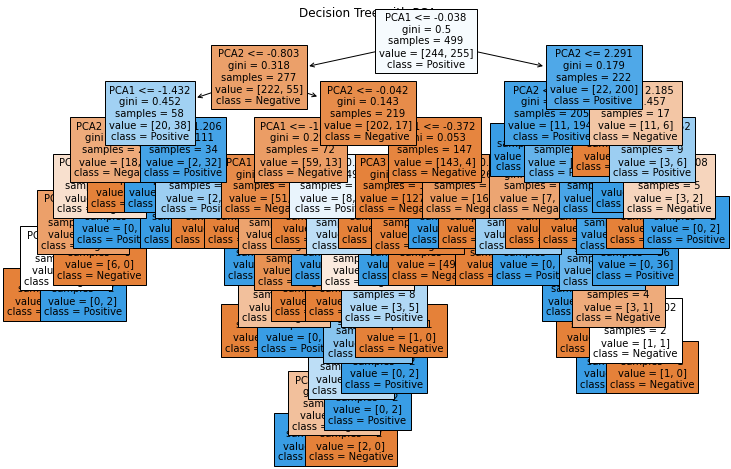

In [62]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier_pca, feature_names=X_train_pca.columns, class_names=["Negative", "Positive"], filled=True, fontsize=10)
plt.title("Decision Tree with PCA")
plt.show()

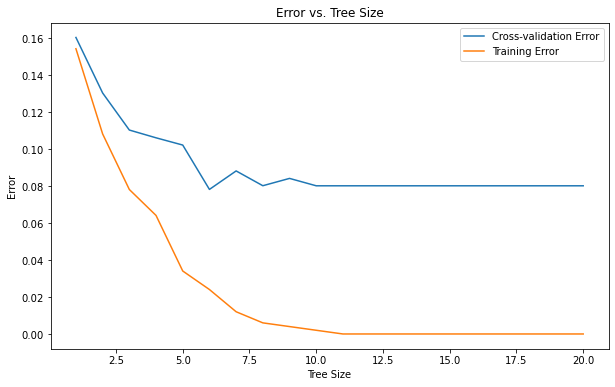

In [64]:
# Cross-validate the Decision Tree Classifier with different tree sizes
train_errors = []
cv_errors = []
tree_sizes = range(1, 21)  # Test tree sizes from 1 to 20

for size in tree_sizes:
    tree_classifier_pca = DecisionTreeClassifier(max_depth=size, random_state=42)
    cv_error = 1 - cross_val_score(tree_classifier_pca, X_train_pca, Y_train, cv=kf, scoring='accuracy').mean()
    train_error = 1 - accuracy_score(Y_train, tree_classifier_pca.fit(X_train_pca, Y_train).predict(X_train_pca))
    cv_errors.append(cv_error)
    train_errors.append(train_error)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(tree_sizes, cv_errors, label='Cross-validation Error')
plt.plot(tree_sizes, train_errors, label='Training Error')
plt.xlabel('Tree Size')
plt.ylabel('Error')
plt.title('Error vs. Tree Size')
plt.legend()
plt.show()


In [65]:
# Initialize the Decision Tree Classifier with max depth 5
tree_classifier_pca_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Cross-validate the Decision Tree Classifier with max depth 5
cv_accuracy_tree_5 = cross_val_score(tree_classifier_pca_5, X_train_pca, Y_train, cv=kf, scoring='accuracy')
print("Cross-validated Accuracy (Max Depth 5):", cv_accuracy_tree_5.mean())

# Train the Decision Tree Classifier on the training data with reduced features
tree_classifier_pca_5.fit(X_train_pca, Y_train)

# Predict on the training data
Y_train_pred_tree_5 = tree_classifier_pca_5.predict(X_train_pca)

# Calculate metrics for the training set
train_accuracy_tree_5 = accuracy_score(Y_train, Y_train_pred_tree_5)
train_recall_tree_5 = recall_score(Y_train, Y_train_pred_tree_5)
train_conf_matrix_tree_5 = confusion_matrix(Y_train, Y_train_pred_tree_5)

print("\nTrain Set Metrics (Max Depth 5):")
print("Accuracy:", train_accuracy_tree_5)
print("Sensitivity (Recall):", train_recall_tree_5)
print("Confusion Matrix:")
print(train_conf_matrix_tree_5)

# Predict on the testing data
Y_test_pred_tree_5 = tree_classifier_pca_5.predict(X_test_pca)

# Calculate metrics for the testing set
test_accuracy_tree_5 = accuracy_score(Y_test, Y_test_pred_tree_5)
test_recall_tree_5 = recall_score(Y_test, Y_test_pred_tree_5)
test_conf_matrix_tree_5 = confusion_matrix(Y_test, Y_test_pred_tree_5)

print("\nTest Set Metrics (Max Depth 5):")
print("Accuracy:", test_accuracy_tree_5)
print("Sensitivity (Recall):", test_recall_tree_5)
print("Confusion Matrix:")
print(test_conf_matrix_tree_5)


Cross-validated Accuracy (Max Depth 5): 0.897795918367347

Train Set Metrics (Max Depth 5):
Accuracy: 0.9659318637274549
Sensitivity (Recall): 0.9725490196078431
Confusion Matrix:
[[234  10]
 [  7 248]]

Test Set Metrics (Max Depth 5):
Accuracy: 0.9255813953488372
Sensitivity (Recall): 0.9509803921568627
Confusion Matrix:
[[102  11]
 [  5  97]]
